# Set-up
This notebook is aimed to do two things. 
- Calculating the variables of interest for the analysis from the raw data.
- Exploratory data analysis to find patterns in the data.
This is done in a few steps. 

# Step 1: Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import re
import warnings
warnings.filterwarnings('ignore')
import osmnx
import geopandas as gpdz

# Step 2: Importing the data

In [10]:
fwp_raw= pd.read_excel('FWP Example Realistic.xlsx')

In [13]:
fwp_raw

jv_ID                           areaName  sectionID  locFrom  locTo  \
0     292036              AARON PLACE_8_id_1094       1094        8    127   
1     292037   AARON PLACE HAMMERHEAD_0_id_1095       1095        0     50   
2     292038  AARON PLACE HAMMERHEAD_80_id_1095       1095       80    113   
3     292039          AARON PLACE RAB_0_id_1362       1362        0     53   
4     292040           ABELIA AVENUE_18_id_1028       1028       18     67   
...      ...                                ...        ...      ...    ...   
3594  295630              YORK AVENUE_13_id_678        678       13    200   
3595  295631             YORK AVENUE_200_id_678        678      200    247   
3596  295632            ZACHARY PLACE_4_id_1122       1122        4     54   
3597  295633              ZAPOTE PLACE_3_id_977        977        3     97   
3598  295634             ZAPOTE PLACE_97_id_977        977       97    121   

     lane  info_area_m2  info_jv_latitude  info_jv_longitude info_surf_class  \
0     All         785.4        -37.694304         176.128057              ac   
1     All         365.0        -37.694977         176.127427              ac   
2     All         267.3        -37.695154         176.128164              ac   
3     All         307.4          0.000000           0.000000              ac   
4     All         367.5        -37.682016         176.237100              ac   
...   ...           ...               ...                ...             ...   
3594  All        2187.9        -37.656198         176.191476              ac   
3595  All         549.9        -37.656219         176.192837              ac   
3596  All         280.0        -37.735845         176.184094              ac   
3597  All         526.4        -37.752167         176.162370            seal   
3598  All         134.4        -37.751640         176.162226              ac   

      ... Treatment_2032  Treatment_2033 Treatment_2034 Treatment_2035  \
0     ...            NaN             NaN            NaN            NaN   
1     ...            NaN             NaN       ChipSeal            NaN   
2     ...            NaN             NaN            NaN            NaN   
3     ...            NaN             NaN      ThinAC_SR            NaN   
4     ...            NaN        ChipSeal            NaN            NaN   
...   ...            ...             ...            ...            ...   
3594  ...            NaN             NaN            NaN            NaN   
3595  ...            NaN             NaN            NaN            NaN   
3596  ...            NaN             NaN            NaN            NaN   
3597  ...            NaN             NaN            NaN            NaN   
3598  ...            NaN             NaN            NaN            NaN   

     Treatment_2036 Treatment_2037 Treatment_2038 Treatment_2039  \
0               NaN            NaN            NaN       ChipSeal   
1               NaN            NaN            NaN            NaN   
2               NaN            NaN            NaN            NaN   
3               NaN            NaN            NaN            NaN   
4               NaN            NaN            NaN            NaN   
...             ...            ...            ...            ...   
3594            NaN            NaN            NaN            NaN   
3595            NaN            NaN            NaN            NaN   
3596            NaN            NaN            NaN       ChipSeal   
3597            NaN            NaN            NaN            NaN   
3598            NaN            NaN            NaN       ChipSeal   

     Treatment_2040 Treatment_2041  
0               NaN            NaN  
1               NaN       ChipSeal  
2          ChipSeal            NaN  
3               NaN            NaN  
4          ChipSeal            NaN  
...             ...            ...  
3594            NaN            NaN  
3595            NaN            NaN  
3596            NaN            NaN  
3597            NaN            Na

In [14]:
print(max(fwp_raw['locFrom']))
print(max(fwp_raw['locTo']))

9767
10403


In [15]:
fwp_raw['lane'].unique()

array(['All'], dtype=object)

In [16]:
fwp_raw['info_surf_class'].unique()

array(['ac', 'seal', 'concrete', 'block'], dtype=object)

In [17]:
fwp_raw['info_urban_rural'].unique()

array(['U', 'R'], dtype=object)

In [18]:
fwp_raw.columns

Index(['jv_ID', 'areaName', 'sectionID', 'locFrom', 'locTo', 'lane',
       'info_area_m2', 'info_jv_latitude', 'info_jv_longitude',
       'info_surf_class', 'info_urban_rural', 'Treatment_2022',
       'Treatment_2023', 'Treatment_2024', 'Treatment_2025', 'Treatment_2026',
       'Treatment_2027', 'Treatment_2028', 'Treatment_2029', 'Treatment_2030',
       'Treatment_2031', 'Treatment_2032', 'Treatment_2033', 'Treatment_2034',
       'Treatment_2035', 'Treatment_2036', 'Treatment_2037', 'Treatment_2038',
       'Treatment_2039', 'Treatment_2040', 'Treatment_2041'],
      dtype='object')

In [19]:
fwp_raw.drop(['lane'], axis=1, inplace=True)

In [20]:
# identifying categorical variables
fwp_raw["jv_ID"] = fwp_raw["jv_ID"].astype("category")
fwp_raw['areaName'] = fwp_raw['areaName'].astype("category")
fwp_raw['sectionID'] = fwp_raw['sectionID'].astype("category")
fwp_raw['locFrom'] = fwp_raw['locFrom'].astype("uint16")  #saves some memory requirements
fwp_raw['locTo'] = fwp_raw['locTo'].astype("uint16")

for i in range(22,42):
    name='Treatment_20'+str(i)
    fwp_raw[name] = fwp_raw[name].astype("category")


In [21]:
fwp_raw.head()

jv_ID                           areaName sectionID  locFrom  locTo  \
0  292036              AARON PLACE_8_id_1094      1094        8    127   
1  292037   AARON PLACE HAMMERHEAD_0_id_1095      1095        0     50   
2  292038  AARON PLACE HAMMERHEAD_80_id_1095      1095       80    113   
3  292039          AARON PLACE RAB_0_id_1362      1362        0     53   
4  292040           ABELIA AVENUE_18_id_1028      1028       18     67   

   info_area_m2  info_jv_latitude  info_jv_longitude info_surf_class  \
0         785.4        -37.694304         176.128057              ac   
1         365.0        -37.694977         176.127427              ac   
2         267.3        -37.695154         176.128164              ac   
3         307.4          0.000000           0.000000              ac   
4         367.5        -37.682016         176.237100              ac   

  info_urban_rural  ... Treatment_2032 Treatment_2033 Treatment_2034  \
0                U  ...            NaN            NaN            NaN   
1                U  ...            NaN            NaN       ChipSeal   
2                U  ...            NaN            NaN            NaN   
3                U  ...            NaN            NaN      ThinAC_SR   
4                U  ...            NaN       ChipSeal            NaN   

  Treatment_2035 Treatment_2036 Treatment_2037 Treatment_2038 Treatment_2039  \
0            NaN            NaN            NaN            NaN       ChipSeal   
1            NaN            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   

  Treatment_2040 Treatment_2041  
0            NaN            NaN  
1            NaN       ChipSeal  
2       ChipSeal            NaN  
3            NaN            NaN  
4       ChipSeal            NaN  

[5 rows x 30 columns]

In [22]:
#finding the statistical features of numerical features 
fwp_raw.describe()

locFrom         locTo  info_area_m2  info_jv_latitude  \
count  3599.000000   3599.000000   3599.000000       3599.000000   
mean    381.093637    544.744651   1412.830945        -36.277995   
std     866.601142    912.925073   1565.825575          7.190350   
min       0.000000     13.000000     38.000000        -37.769053   
25%       6.000000    107.000000    394.900000        -37.722971   
50%      37.000000    232.000000    881.400000        -37.700225   
75%     342.500000    552.500000   1823.250000        -37.680113   
max    9767.000000  10403.000000  16938.000000          0.000000   

       info_jv_longitude  
count        3599.000000  
mean          169.526574  
std            33.600220  
min             0.000000  
25%           176.133036  
50%           176.161107  
75%           176.218292  
max           176.354783

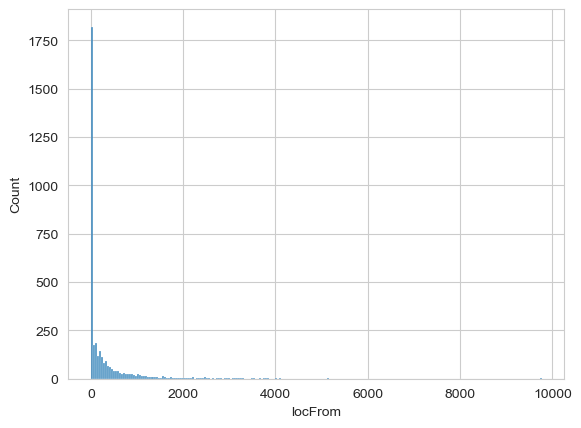

In [46]:
sns.histplot(data=fwp_raw, x="locFrom")

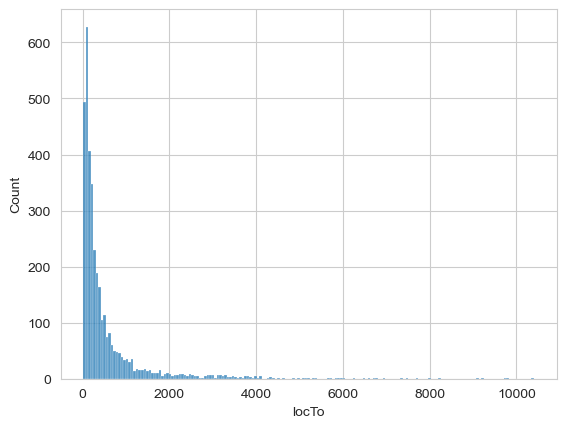

In [48]:
sns.histplot(data=fwp_raw, x="locTo")

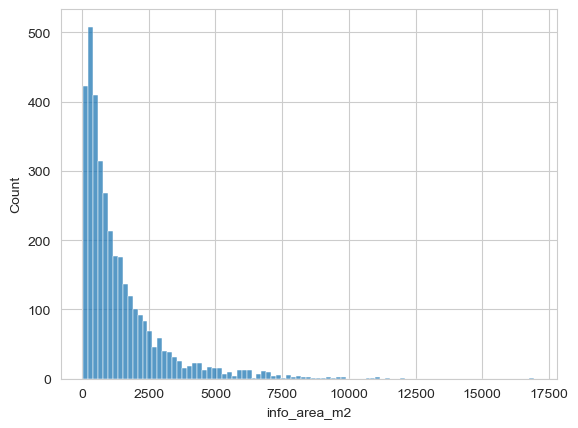

In [49]:
sns.histplot(data=fwp_raw, x="info_area_m2")

#  Step 4: Plotting the road networks


In [5]:
!conda config --prepend channels conda-forge


In [6]:
!conda create -n ox --strict-channel-priority osmnx

^C


In [ ]:
!conda activate ox

In [7]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


In [8]:
import plotly.express as px

In [23]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

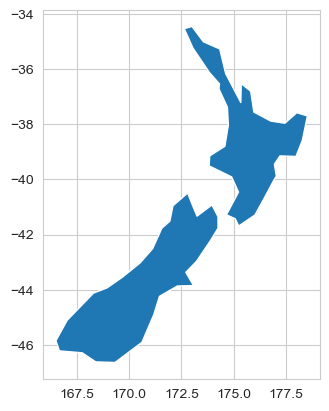

In [49]:
ax=countries[countries["name"] == "New Zealand"].plot()

In [66]:
geometry = [Point(xy) for xy in zip(fwp_raw['info_jv_longitude'], fwp_raw['info_jv_latitude'])]
geo_df = gpd.GeoDataFrame(fwp_raw,geometry = geometry)
ax.scatter(fwp_raw['info_jv_longitude'],fwp_raw['info_jv_latitude'])


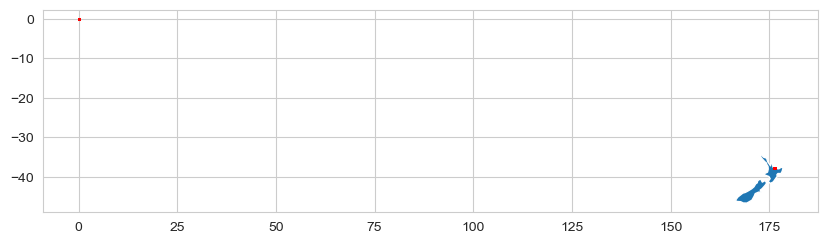

In [55]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

#df = pd.read_csv("Long_Lats.csv", delimiter=',', skiprows=0, low_memory=False)

#geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=countries[countries["name"] == "New Zealand"].plot(figsize=(10,10)), marker='o', color='red', markersize=0.2);


In [48]:
gdf

geometry
0     POINT (176.12806 -37.69430)
1     POINT (176.12743 -37.69498)
2     POINT (176.12816 -37.69515)
3         POINT (0.00000 0.00000)
4     POINT (176.23710 -37.68202)
...                           ...
3594  POINT (176.19148 -37.65620)
3595  POINT (176.19284 -37.65622)
3596  POINT (176.18409 -37.73585)
3597  POINT (176.16237 -37.75217)
3598  POINT (176.16223 -37.75164)

[3599 rows x 1 columns]

In [81]:
import folium

In [83]:
map = folium.Map(location=[ -40.9006, 174.8860], tiles="OpenStreetMap", zoom_start=9)
map

In [84]:
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]


In [85]:
# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    # assign a color marker for the type of treatment
    #print(coordinates)
    
    if geo_df.info_urban_rural[i] == "U":
        type_color = "green"
    else:
        type_color = "purple"

    # Place the markers with the popup labels and data
    map.add_child(
        folium.Marker(
            location=coordinates,
            popup="Area: "
            + str(geo_df.info_area_m2[i])
            + "<br>"
            + "Name: "
            + str(geo_df.areaName[i])
            + "<br>"
            + "Section ID: "
            + str(geo_df.sectionID[i])
            + "<br>"
            + "Type: "
            + str(geo_df.info_surf_class[i])
            + "<br>"
            + "Coordinates: "
            + str(geo_df_list[i]),
            icon=folium.Icon(color="%s" % type_color),
        )
    )
    i = i + 1

In [86]:
map

In [ ]:
# let us now find the costs per year
costs_per_year = fwp_raw.groupby(['year']).sum()
costs_per_year